In [1]:
import pandas as pd
data = pd.read_csv('src_info/President Obama Farewell Speech   -   English subtitles-9J_lf2ETt0o.csv')
data.rename(columns={k:k.lstrip() for k in data.keys() }, inplace=True)
data.set_index('frame', inplace=True)
data.query("confidence > 0.8 and success==1 and y_27<300", inplace=True)
not_used =  [k for k in data.keys() if not any(k.startswith(s) for s in ['gaze','AU','pose']) or k.endswith('_c')]
data.drop(labels=not_used, axis=1, inplace=True)
data.head()

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


gaze_0_x  gaze_0_y  gaze_0_z  gaze_1_x  gaze_1_y  gaze_1_z  \
frame                                                               
1      0.567839  0.539801 -0.621429  0.331093  0.471291 -0.817473   
2      0.543857  0.523812 -0.655622  0.411251  0.420580 -0.808693   
3      0.501326  0.529015 -0.684702  0.400363  0.454734 -0.795566   
4      0.486161  0.541244 -0.686078  0.426122  0.437629 -0.791771   
5      0.482194  0.550821 -0.681238  0.401125  0.460050 -0.792119   

       gaze_angle_x  gaze_angle_y  pose_Tx  pose_Ty   ...    AU10_r  AU12_r  \
frame                                                 ...                     
1             0.558         0.613    -61.3   -133.2   ...      2.84    0.85   
2             0.578         0.573    -64.8   -133.3   ...      2.71    1.11   
3             0.547         0.587    -67.2   -132.2   ...      2.44    1.24   
4             0.553         0.585    -69.2   -130.4   ...      2.04    1.37   
5             0.540         0.601    -72.2   -129.1   ...      1.70    1.32   

       AU14_r  AU15_r  AU17_r  AU20_r  AU23_r  AU25_r  AU26_r  AU45_r  
frame                                                                  
1        1.90    0.58    3.42    1.13     0.0    0.41    0.81    1.11  
2        1.35    0.32    3.25    0.69     0.0    0.14    0.98    1.14  
3        1.08    0.29    2.91    0.34     0.0    0.00    1.08    1.18  
4        1.04    0.44    2.51    0.13     0.0    0.00    0.94    0.94  
5        1.35    0.52    2.10    0.13     0.0    0.00    0.50    0.69  

[5 rows x 31 columns]

In [2]:
data_mean = data.mean()
data_std = data.std()
data = (data-data_mean)/data_std

In [8]:
data

gaze_0_x  gaze_0_y  gaze_0_z  gaze_1_x  gaze_1_y  gaze_1_z  \
frame                                                               
1      1.015210  4.032397  3.280868  0.613350  3.245128  0.919141   
2      0.956402  3.773005  2.782621  0.806477  2.445583  1.096065   
3      0.852108  3.857414  2.358879  0.780244  2.984079  1.360585   
4      0.814921  4.055807  2.338828  0.842306  2.714390  1.437057   
5      0.805193  4.211175  2.409355  0.782080  3.067895  1.430045   
6      0.850002  4.285461  2.658704  0.774531  2.665008  1.110654   
7      0.894200  4.152561  2.761638  0.784602  2.221854  0.859555   
8      0.978972  4.415781  3.393026  0.664538  3.374904  1.196900   
9      0.921419  4.099430  2.851428  0.628924  3.402291  1.090322   
10     0.860853  4.205513  2.647717  0.596029  3.823656  1.308576   
11     0.989129  3.941904  3.072727  0.511949  4.157248  1.315568   
12     0.978697  3.881408  2.973640  0.445078  4.245273  1.198149   
13     0.821120  4.211905  2.477564  0.493264  4.425093  1.491384   
14     0.802233  4.462082  2.583223  0.430928  4.531833  1.409310   
15     0.779742  4.384357  2.430483  0.293888  4.631289  1.172235   
16     0.590152  4.527542  1.837419  0.274032  4.673639  1.169837   
17     0.606145  4.703774  2.017932  0.166540  4.684723  0.993115   
18     0.569394  4.403809  1.684344  0.111916  3.846187  0.229621   
19     0.215544  4.572075  0.925863  0.028698  3.342898 -0.223450   
20     0.010709  3.436181 -0.044738  0.061877  2.714279 -0.609479   
21    -0.085051  2.909400 -0.403520  0.017586  1.974821 -1.080040   
22    -0.169980  2.576680 -0.617853 -0.025999  1.936839 -1.130357   
23    -0.176349  1.855675 -0.929322 -0.065728  1.666929 -1.292933   
24    -0.166662  1.858563 -0.922866 -0.162441  1.183679 -1.553604   
25    -0.178725  1.894903 -0.914837 -0.164980  1.047029 -1.616132   
26    -0.202371  0.002427 -1.564381 -0.218728  0.636890 -1.791041   
27    -0.267339 -0.191488 -1.639790 -0.297134  0.637600 -1.769701   
28    -0.274826 -0.528864 -1.726534 -0.268538  0.715061 -1.747878   
29    -0.268806 -1.139632 -1.860622 -0.342213  1.179958 -1.510159   
30    -0.295983 -1.551440 -1.945866 -0.358170  1.030380 -1.568657   
...         ...       ...       ...       ...       ...       ...   
91730  0.897621  0.269265  0.724862  0.746096 -0.752645 -0.670374   
91731  0.881834  0.263847  0.662321  0.713706 -0.726677 -0.776650   
91732  0.887049 -0.026272  0.585368  0.694400 -0.865141 -0.884557   
91733  0.885963  0.123614  0.630453  0.689533 -0.952630 -0.926451   
91734  0.877290 -0.003397  0.555860  0.670894 -0.983280 -0.996656   
91735  0.880546  0.228139  0.645170  0.669159 -0.677564 -0.910975   
91736  0.884619  0.138296  0.630234  0.656125 -0.693756 -0.958168   
91737  0.872680  0.220725  0.612894  0.642948 -0.822712 -1.039215   
91738  0.855674  0.267886  0.565521  0.660284 -0.655885 -0.932959   
91739  0.872859  0.093260  0.570811  0.658597 -0.861089 -1.000948   
91740  0.879229  0.057310  0.582949  0.643695 -0.802216 -1.030751   
91741  0.871486 -0.107728  0.500853  0.678725 -1.450937 -1.094126   
91742  0.871336 -0.154888  0.485538  0.692270 -1.367310 -1.028897   
91743  0.885355 -0.000152  0.587379  0.673164 -1.372403 -1.092977   
91744  0.793062  1.373816  0.761830  0.603327 -0.824573 -1.160805   
91745  0.798585  1.402596  0.793902  0.536863 -0.738345 -1.323301   
91746  0.839114  1.289488  0.894650  0.547638  0.373429 -0.900839   
91747  0.865568  0.815968  0.802500  0.674077 -0.672109 -0.893182   
91748  0.831515  0.429257  0.533202  0.685003 -0.811313 -0.899892   
91749  0.873962 -0.029857  0.534848  0.754929 -1.040372 -0.723895   
91750  0.893410 -0.319926  0.518003  0.694737 -1.354917 -1.017573   
91751  0.880441 -0.198756  0.505967  0.777039 -1.040482 -0.642607   
91752  0.846368 -0.201741  0.379544  0.821660 -0.991053 -0.457199   
91753  0.888072 -0.035989  0.586111  0.726439 -1.376612 -0.914904   
91754  0.869188  0.126274  0.567999  0.757377 -1.065520 -0.722101   
91755

In [6]:
from PIL import Image
import numpy as np
for i,x in data.iterrows():
    img = Image.open("obama/{:07d}.png".format(i))
    img_array = np.array(img)[0:512, 280:792]
    Image.fromarray(img_array).save("src_obama2/{:07d}.png".format(i))


[ 0.86868266 -0.25514736  0.44489769  0.9788133  -0.14953724  0.51572212
  0.91602482 -0.06817232  0.67757214  0.40783554 -0.06064742  0.16063584
 -1.01575257 -0.18647262 -0.63413952 -0.39207322  1.4688022  -0.39883404
  0.04324723  0.80690012  0.35234743 -0.15306459 -0.38341878 -0.75332164
 -0.59221271  0.36225633  1.75279465 -0.53963723 -1.03309558 -0.78377319
 -0.55246933]


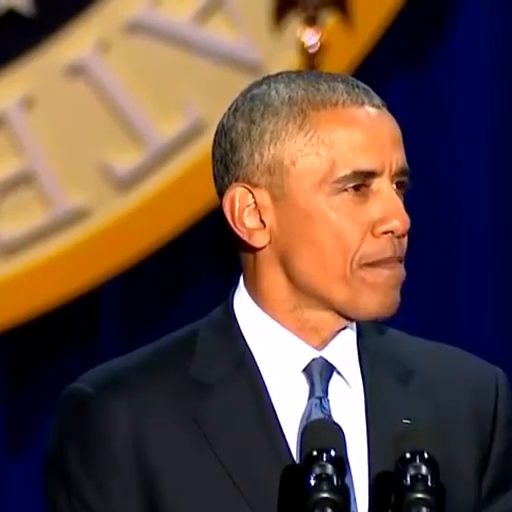

[-1.11460691 -1.35840075 -1.22818533 -1.06931619 -0.88363488 -0.86912172
 -1.07242694 -1.36875722 -1.28122    -0.05543669  0.08321808 -0.39326506
  0.99928581  0.91982577 -0.18998326 -0.39207322 -0.59450414 -0.24783003
 -0.4622382  -0.56499944 -0.51957267  1.10277419  0.42748601 -0.75332164
  0.38536239 -0.20197737 -0.50539712  0.34273112  1.46893932 -0.96897227
 -0.55246933]


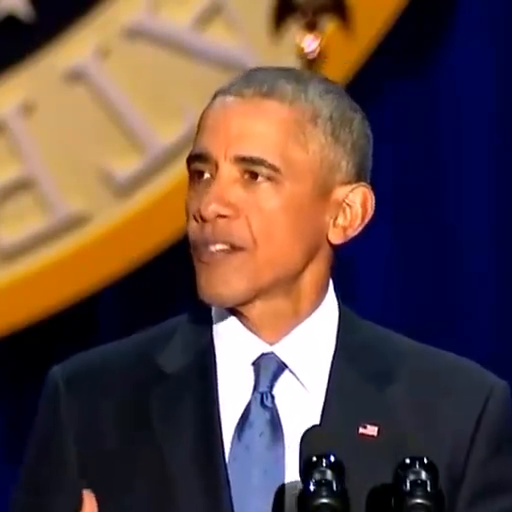

[ 1.04633581  0.20385342  1.32817034  0.93378781  0.68521504  0.66328646
  1.01220415  0.78903137  0.35308536 -0.42053203 -0.07632507 -0.20565346
 -1.1214364  -0.87036617 -0.59249987  0.16004047  0.64546361 -0.39883404
  0.21174237 -0.15084108  1.49674257 -0.8088915   0.49699213 -0.75332164
 -0.59221271 -1.14236685 -0.50539712 -0.53963723  0.17324267  0.01400748
 -0.13656977]


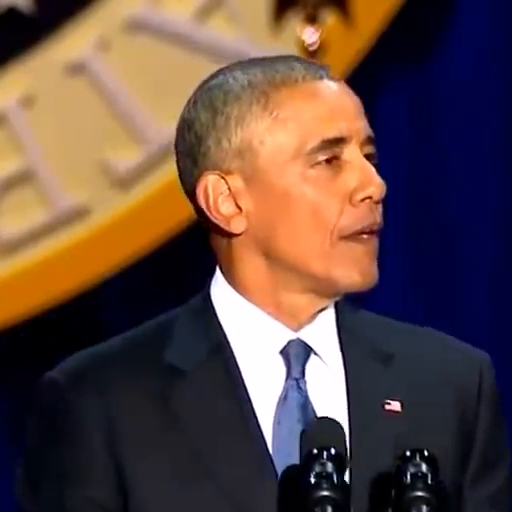

[ 0.77410695 -0.4746462   0.04990508  1.01080915 -0.73134431  0.46127465
  0.87352698 -0.55589165  0.10642264 -0.37144358  0.06292935  0.21423916
 -0.73569042 -0.25352101 -0.63413952 -0.39207322 -0.26715266 -0.39883404
 -0.4622382  -0.56499944  0.13436741 -0.37632481 -0.52243102  0.7515643
 -0.3749738  -0.98398546  1.16370114 -0.53963723 -1.03309558 -0.96897227
 -0.55246933]


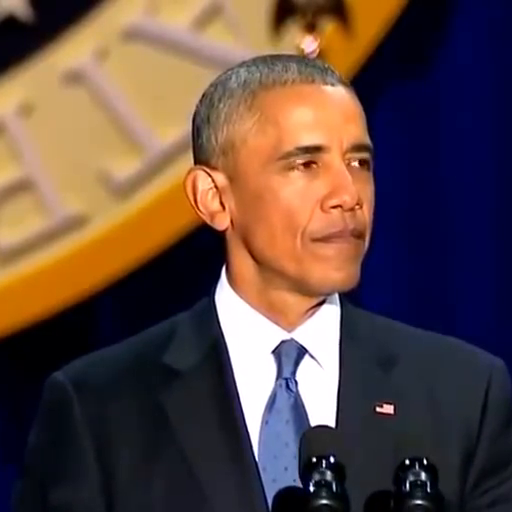

[ 0.91498474 -0.15500203  0.65190197  1.10474636 -0.42740959  1.05969307
  1.00996743 -0.05339294  0.57072893 -0.59847766 -0.13258017 -1.00970316
 -0.83961285 -1.57437424 -0.63413952 -0.1040139   0.42722929 -0.39883404
  0.04324723 -0.56499944  0.46133745 -0.6554001   0.35797988  0.15303012
 -0.59221271 -1.05327732 -0.50539712 -0.53963723  1.39447399  0.25619089
  0.95790275]


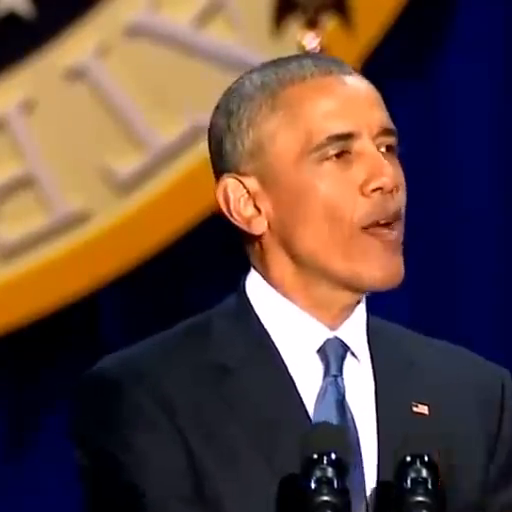

[ 0.92632362 -0.26025765  0.66354468  0.95089403  0.27923823  0.55916726
  0.93839211  0.19785642 -0.07692558 -0.86846413  0.065696   -0.33072786
 -1.1249592  -0.89048069 -0.63413952 -0.39207322  0.93313613 -0.39883404
  0.08537101 -0.56499944  0.40684244  0.07019564 -0.26757523 -0.75332164
 -0.59221271 -0.61772851  1.8509769  -0.53963723 -0.27354927 -0.96897227
 -0.55246933]


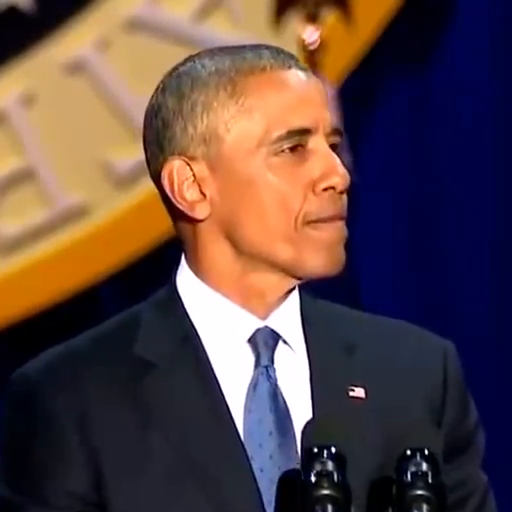

[ 0.81719667 -0.01395822  0.3339786   0.98163703  0.63860867  0.8710211
  0.90260445  0.47866452  0.74484379  0.04887626 -0.19160192 -0.18778569
 -1.03865074 -0.60217262 -0.63413952 -0.39207322  1.3497653  -0.39883404
 -0.4622382   0.0044683   0.67931747 -0.19492588  1.02987242 -0.75332164
 -0.59221271  0.21377378 -0.50539712 -0.53963723  0.05409816  1.02547939
  0.45444539]


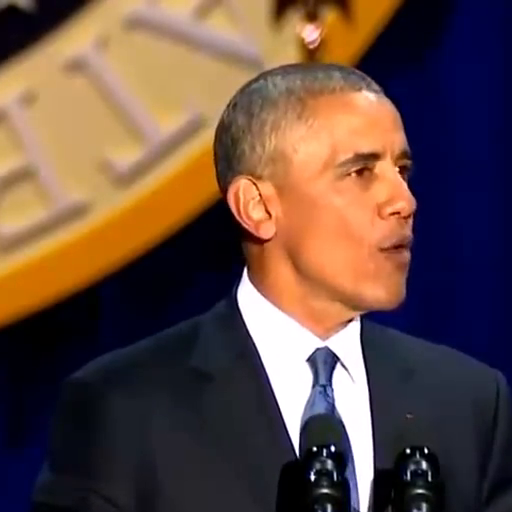

[-1.43337817  0.17145584 -0.05758968 -1.49499591  0.82558598  1.74332925
 -1.49964211  0.7151345  -0.54255091  0.0427402  -0.17961312  0.91108223
  1.46429467  0.19570319  1.48948262 -0.03199907  0.0998778  -0.39883404
 -0.4622382  -0.56499944 -0.08361262 -0.08329577 -1.26382968 -0.06928257
 -0.59221271  1.41153302 -0.34176003  1.16207316 -1.03309558 -0.19968377
 -0.55246933]


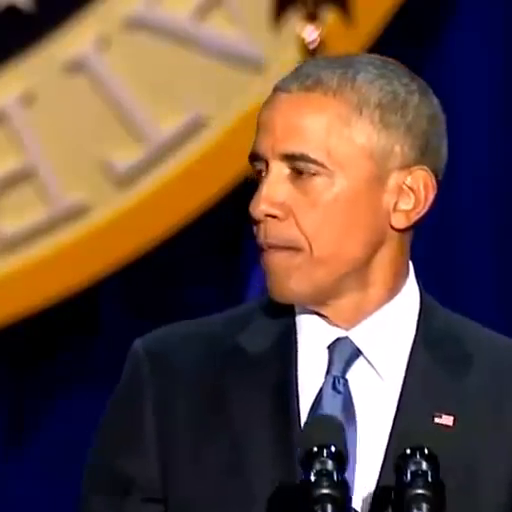

[ 0.92636286  0.80376823  1.0371316   0.72381505  0.19848118 -0.41165817
  0.82879241  0.61167889  0.74748189  0.80361116 -0.08278058  2.04568569
 -0.94529669  1.39586932 -0.63413952 -0.39207322  0.93313613 -0.39883404
 -0.4622382   0.0044683  -0.51957267  1.28417312 -1.47234806 -0.73622066
 -0.59221271  0.41175051  1.75279465 -0.53963723 -1.03309558  0.71206555
 -0.55246933]


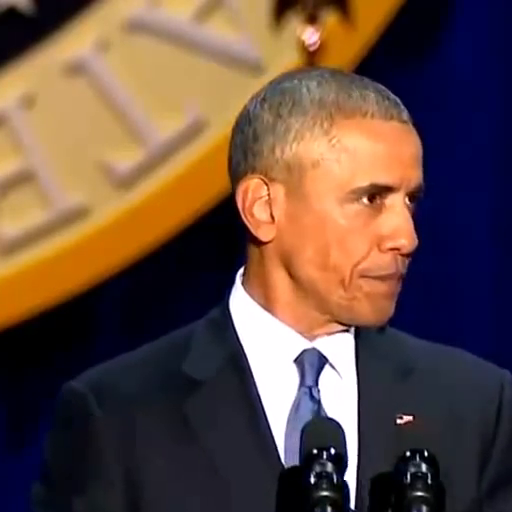

[ 0.8607425  -0.26483257  0.41272357  1.04267248 -0.10218983  0.85405412
  0.94733902 -0.00905482  0.80024397 -0.02782444 -0.08185836 -0.4290006
 -0.83609006 -1.68165165 -0.63413952 -0.34406333  1.08193226 -0.39883404
 -0.25161927 -0.22849577  1.27876254 -0.23678717  0.31164247  0.1701311
 -0.51074812  0.22367261 -0.50539712 -0.53963723  0.66471382 -0.07146902
 -0.53057987]


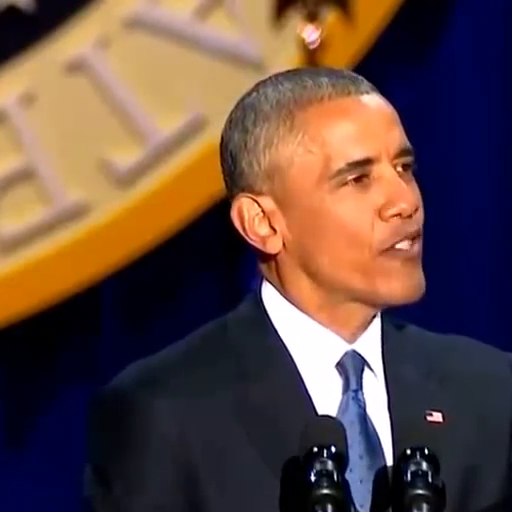

[-1.16271380e+00  1.85921208e+00 -1.36786378e-01 -1.41180188e+00
  1.84742594e+00  1.86082858e+00 -1.34754456e+00  2.00094003e+00
 -9.97623835e-01  2.51366113e-01  6.75404255e-02  1.43818147e+00
  1.36213363e+00 -4.21141974e-01  1.00368670e+00 -3.92073218e-01
 -5.25065950e-01  7.08528736e-01 -4.62238197e-01 -5.64999442e-01
 -5.19572667e-01  9.81031676e-02 -4.06587484e-01 -1.88989409e-01
  5.21136711e-01  1.74809346e+00 -5.05397116e-01  1.49821348e+00
 -1.03309558e+00 -2.38607083e-04 -5.52469325e-01]


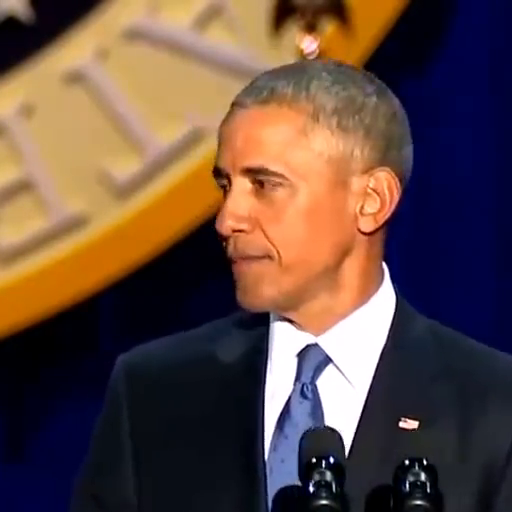

[-1.02934213 -0.04781587 -1.06794134 -1.05772251  0.35275836 -0.47025671
 -1.04111274 -0.09773106 -0.92375693 -0.79176343  0.19480606 -0.14311626
  1.11025384  0.67174674 -0.20386314 -0.39207322 -0.14811575  0.90986742
 -0.4622382  -0.53911454 -0.51957267  0.53066986  1.93345204 -0.22319136
  1.55302155 -0.30096573  2.27643332  0.40575743  0.09877735 -0.96897227
 -0.55246933]


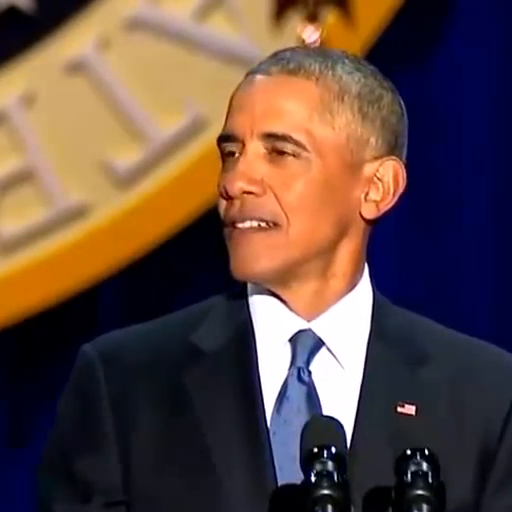

[ 1.04187039 -0.40281022  1.10443786  1.1092518  -0.50159193  1.05701302
  1.08154274 -0.14206918  0.19743723 -0.29167485 -0.02744769 -0.04484352
 -0.96643345 -0.38091294 -0.63413952 -0.39207322  0.82401897 -0.39883404
 -0.4622382  -0.51322965  2.47765268 -1.79960876 -0.98580519 -0.75332164
 -0.59221271 -1.14236685 -0.50539712 -0.53963723 -0.63098283 -0.96897227
 -0.55246933]


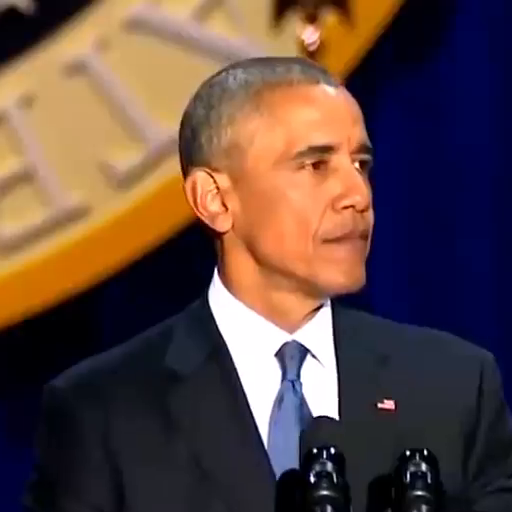

[ 0.87483028 -0.24299625  0.47141801  1.13230423 -0.40320771  1.22343851
  1.00325724 -0.09773106  0.21986111  0.06114837 -0.15840218 -0.26819066
 -0.95058088 -1.66153714 -0.63413952 -0.39207322  0.79425974 -0.39883404
 -0.29374306 -0.56499944 -0.51957267 -0.57167751  0.17263022  0.44374673
 -0.59221271 -0.68702036 -0.50539712 -0.53963723  0.45621091  1.72353747
 -0.53057987]


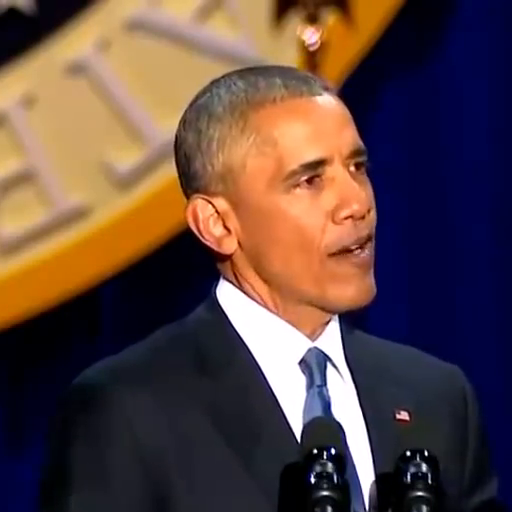

[-0.89049229 -0.73806103 -1.45544415 -0.81789338 -0.53255773 -1.48090012
 -0.84204389 -0.99927287 -0.60850351  0.10410077 -0.25984581 -0.16991792
  0.65229057  1.06733222 -0.63413952 -0.39207322 -0.76313976 -0.39883404
 -0.4622382  -0.56499944 -0.51957267 -0.97633667 -1.40284193 -0.75332164
 -0.59221271 -1.14236685 -0.50539712 -0.49761969  0.7987514   1.48135405
 -0.42113262]


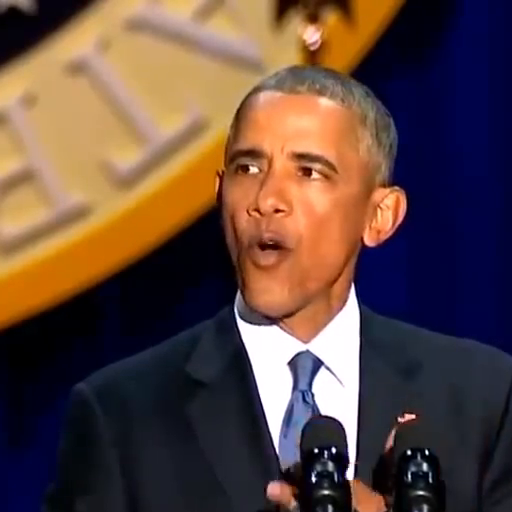

[-1.04747356 -0.112319   -1.05438975 -1.2501361   0.060491    0.15383384
 -1.14847571 -0.20118668 -0.04263023 -0.34689936 -0.29304554  0.41971852
  0.92882993  0.68515642  1.87811935  0.9041937  -1.47736119 -0.39883404
 -0.4622382   0.21154748 -0.51957267 -1.01819797 -0.12856299 -0.75332164
  0.57544644 -1.14236685 -0.50539712 -0.53963723  1.45404625  0.44138997
  0.95790275]


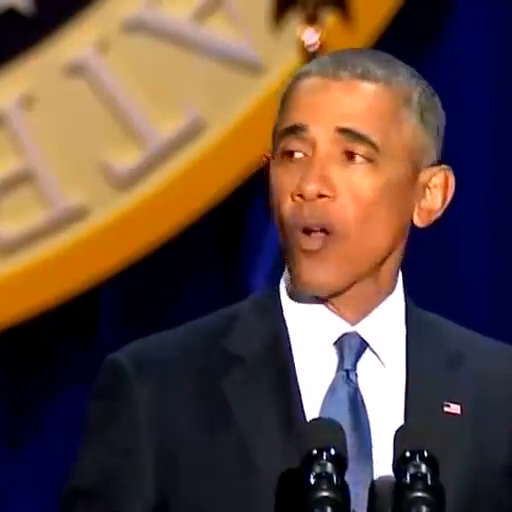

[ 1.03545793  0.37411508  1.34125565  1.15391829  0.21312844  1.60680755
  1.12627731  0.774252   -0.14024007 -0.32849119 -0.24140151  0.01769368
 -1.01575257 -1.09162585 -0.63413952 -0.39207322  0.37763058 -0.39883404
 -0.4622382   0.52216625  0.67931747  0.51671609  0.54332955 -0.1205855
  0.00519429  0.91659118  0.08369639 -0.53963723 -0.70544815  1.90873655
  0.629561  ]


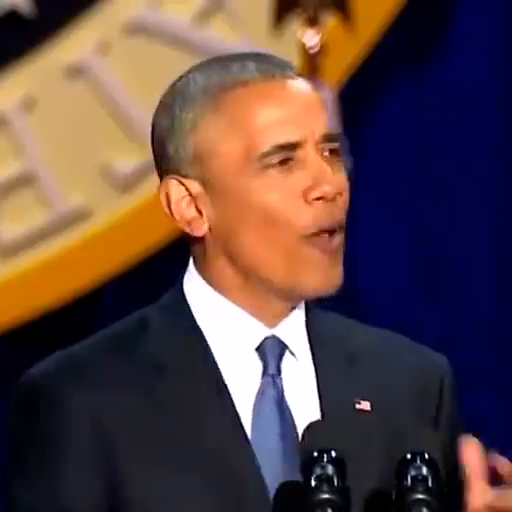

[-0.42613506 -1.20739594 -1.88591862 -0.3158549   3.14341732 -0.41560773
 -0.38127779  0.52300264 -0.66522274 -0.51257287 -0.0652585   0.65199955
  0.04813133 -1.28606617 -0.55086022  2.51252488 -1.47736119  1.51388348
  0.88572294 -0.28026557 -0.51957267 -1.38099583 -0.38341878  2.71817662
 -0.59221271  0.47114353  2.53825265  2.69571338 -1.03309558 -0.39912894
 -0.55246933]


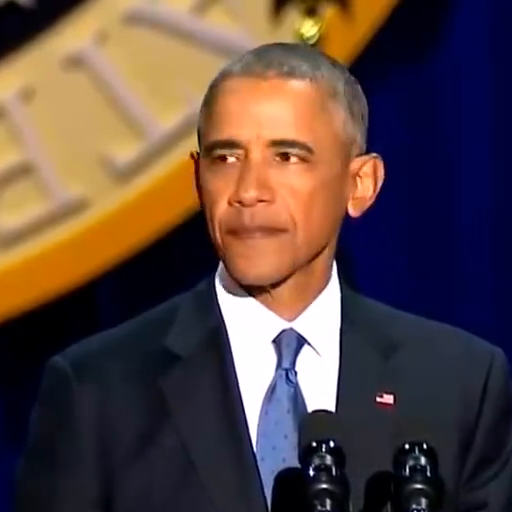

[-1.0295849   0.51069754 -0.8998724  -1.0108804   0.95624464 -0.35872201
 -1.02545564  0.47866452 -1.5529447   0.62259751 -0.15102447  0.95575165
  1.18070972  0.06160641 -0.63413952 -0.39207322  0.50658722  1.96689553
 -0.4622382   0.49628135 -0.51957267 -0.2646947  -1.47234806 -0.75332164
 -0.02196057  1.38183651 -0.50539712  0.72088898 -0.10972556  0.27043697
 -0.55246933]


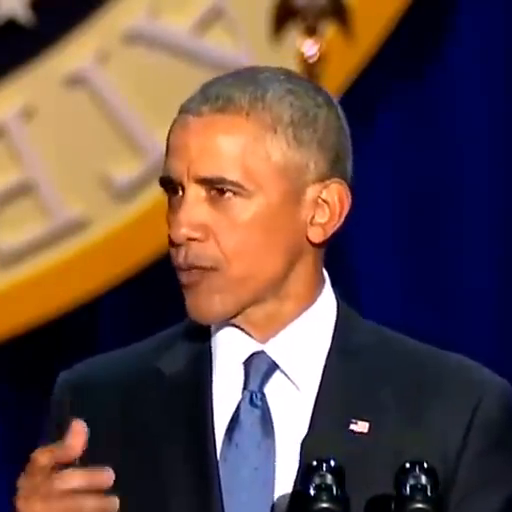

[ 0.98309652 -0.78045204  0.74140079  1.08865206 -0.68297207  0.87960534
  1.03009798 -0.52633291  0.31879001  0.03967218 -0.04958085 -0.12524849
 -0.83785146 -1.62130811 -0.56474011 -0.39207322  0.4073898  -0.39883404
 -0.37799063 -0.56499944 -0.51957267  0.48880856  0.82135405  1.84602681
 -0.42928353 -0.26137039  1.32733823 -0.53963723 -0.22887008 -0.96897227
 -0.55246933]


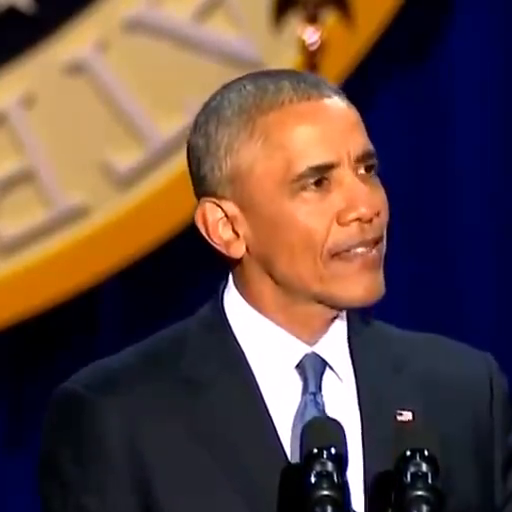

[-1.09665205 -2.0666049  -1.38816703 -1.02580376 -1.34399105 -1.13751027
 -1.03440255 -1.95993218 -0.28269768  0.00592387 -0.09292494 -0.7952899
  0.86189683  0.69856609 -0.52310046 -0.39207322 -1.36824402 -0.39883404
 -0.4622382  -0.56499944 -0.51957267  0.53066986  0.42748601 -0.59941285
 -0.56505785 -0.96418779 -0.50539712 -0.53963723  1.21575722 -0.9404801
 -0.55246933]


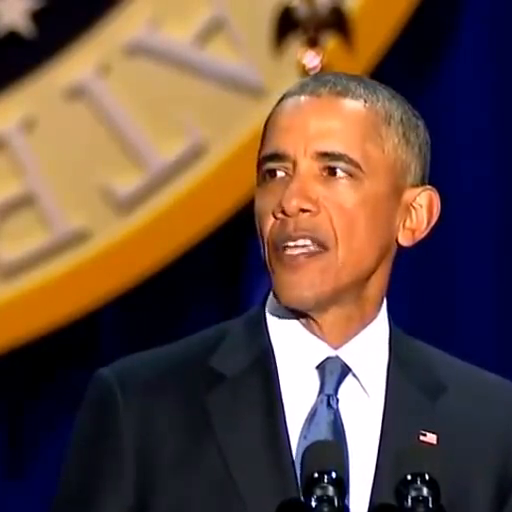

[ 1.11994047  1.57519389  2.27825383  1.11550159  0.55588078  1.54446096
  1.18890572  1.7940288  -0.35260743  0.66248187 -0.07909172  2.19756174
 -0.96643345  0.91312093 -0.63413952 -0.39207322  1.18112968 -0.39883404
 -0.4622382  -0.22849577  0.40684244 -0.48795493 -1.44917935  0.973877
 -0.04911543  0.88689467 -0.0799407  -0.53963723 -1.03309558 -0.9404801
 -0.55246933]


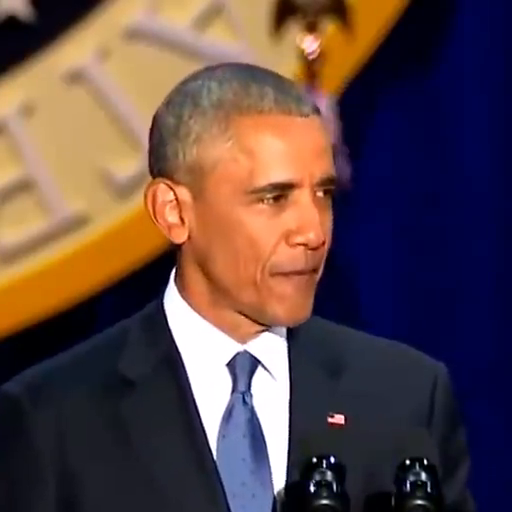

[ 0.44391343 -0.09917827 -0.75054255  0.60926606 -2.09221566 -1.44529365
  0.48657292 -1.35397785  1.45581279 -0.59540963  0.15053975 -0.35752951
 -0.41335473 -0.15965326 -0.63413952 -0.39207322 -1.0805715  -0.39883404
 -0.4622382  -0.56499944 -0.51957267 -0.82284527 -1.10164873 -0.25739332
 -0.59221271 -1.14236685  0.86915439 -0.53963723 -1.03309558 -0.96897227
 -0.55246933]


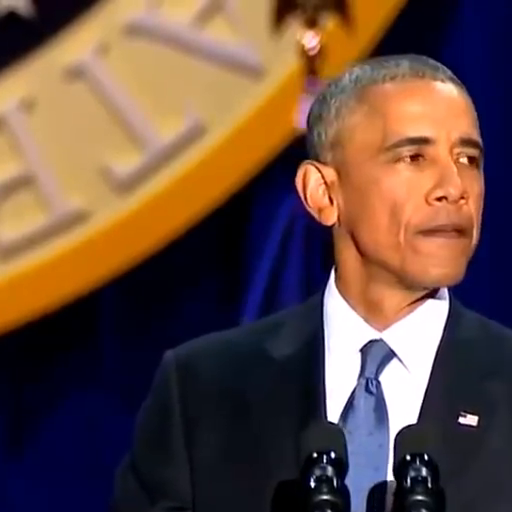

[-0.57242236 -3.92825678 -2.17165331 -0.68400714 -2.11436788 -2.14230996
 -0.61613429 -3.3048552  -0.19564025 -0.40212386 -0.20820178 -1.96562891
  0.35989863  0.51753545  0.35133219 -0.39207322 -0.32667111 -0.39883404
 -0.4622382  -0.51322965 -0.51957267 -1.49262595 -1.47234806 -0.75332164
 -0.59221271 -1.14236685 -0.50539712 -0.53963723 -0.09483249  1.63806097
 -0.09279087]


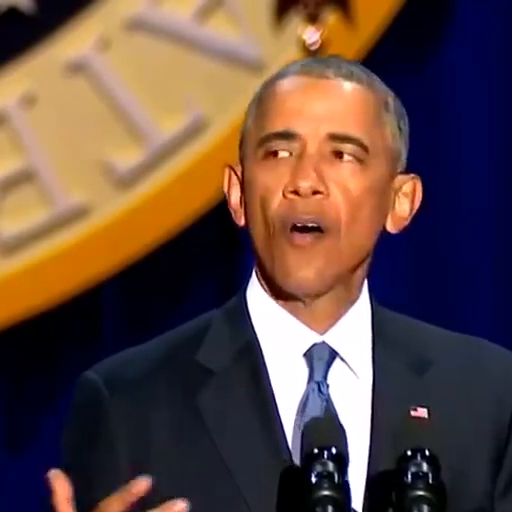

[ 0.16546584 -0.34239531 -1.31810673  0.02020753 -1.27822814 -2.33932437
  0.06159448 -1.22096348 -0.33282165 -1.17219891  0.23353908 -1.98349668
  0.24012362  0.09513061 -0.63413952 -0.39207322 -1.39800325 -0.39883404
  3.49739763  1.66110174 -0.51957267 -1.71588618  0.19579893 -0.42840308
 -0.59221271 -0.74641338  0.08369639 -0.47661092  0.42642478  1.79476788
  3.78164185]


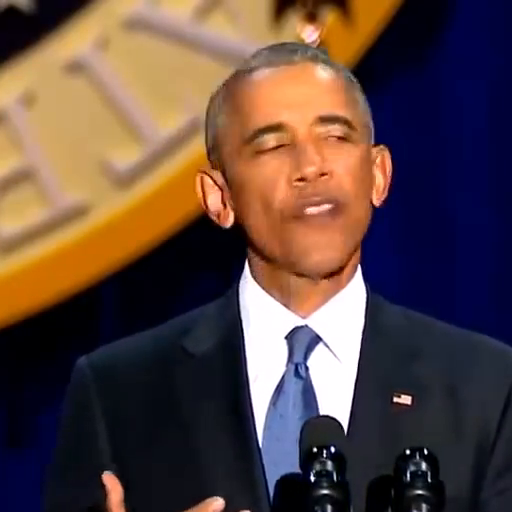

[-1.45763759 -0.76705174 -0.25267439 -1.26678214 -0.10833884  0.15981863
 -1.36096493 -0.46721541 -0.18904499 -0.70279061 -0.10491373 -0.66128162
  1.42554393  1.16119996  2.2528762   2.03242602 -1.04089254  0.50719005
 -0.4622382  -0.56499944 -0.51957267  0.33531716 -0.05905686  0.10172719
  0.52113671  1.00568071  0.54188022  1.05702931 -0.72034122 -0.25666811
 -0.15845922]


FileNotFoundError: [Errno 2] No such file or directory: 'src_obama/0051906.png'

In [3]:
from PIL import Image
from IPython.display import display
X = data.sample(50)
for i, x in X.iterrows():
    print(x.values)
    img = Image.open("src_obama/{:07d}.png".format(i))
    display(img)

In [4]:
data = pd.read_csv('src_info/President Obama Farewell Speech   -   English subtitles-9J_lf2ETt0o.csv')
data.rename(columns={k:k.lstrip() for k in data.keys() }, inplace=True)
data.set_index('frame', inplace=True)

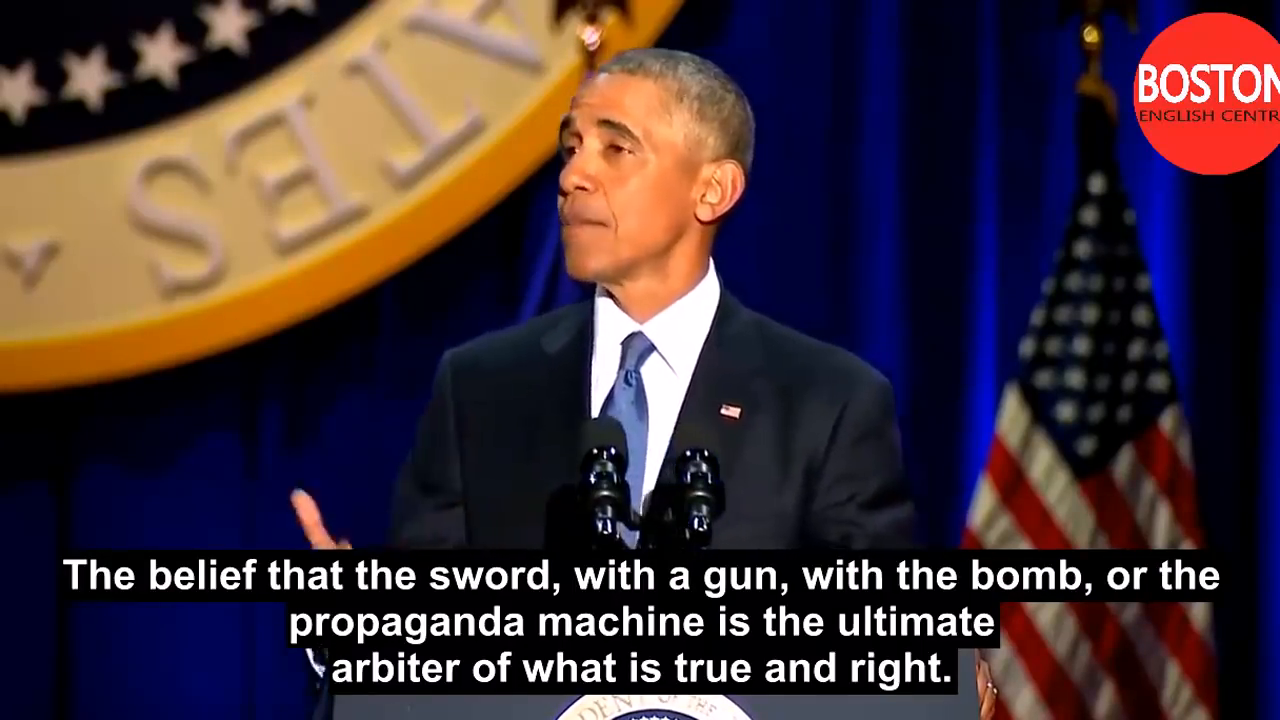

In [14]:
Image.open('obama/0051906.png')